In [2]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer

# 1 特征中含有字符串的时候（当成类别），如何做特征抽取

In [27]:

def dictvec():
    """
    字典数据抽取
    :return: None
    """
    # 实例化
    # sparse改为True,输出的是每个不为零位置的坐标，稀疏矩阵可以节省存储空间
    #矩阵中存在大量的0，sparse存储只记录非零位置，节省空间的作用
    #Vectorizer中文含义是矢量器的含义
    dict1 = DictVectorizer(sparse=True)  # 把sparse改为False看看
    #sprase=True表示用稀疏矩阵存储，sprase=False表示用np.array形式存储

    #每个样本都是一个字典，有三个样本
    # 调用fit_transform
    data = dict1.fit_transform([{'city': '北京', 'temperature': 100},
                               {'city': '上海', 'temperature': 60},
                               {'city': '深圳', 'temperature': 30}])
    print(data)
    print('-' * 50)
    # 字典中的一些类别数据，分别进行转换成特征
    print(dict1.get_feature_names_out())
    print('-' * 50)
    print(dict1.inverse_transform(data))  #去看每个特征代表的含义，逆转回去

    return None


dictvec()

  (0, 1)	1.0
  (0, 3)	100.0
  (1, 0)	1.0
  (1, 3)	60.0
  (2, 2)	1.0
  (2, 3)	30.0
--------------------------------------------------
['city=上海' 'city=北京' 'city=深圳' 'temperature']
--------------------------------------------------
[{'city=北京': 1.0, 'temperature': 100.0}, {'city=上海': 1.0, 'temperature': 60.0}, {'city=深圳': 1.0, 'temperature': 30.0}]


# 2 一段英文文本如何变为数值类型

In [33]:

def couvec():
    # 实例化CountVectorizer
    # max_df, min_df整数：指每个词的所有文档词频数大于等于min_df,小于等于max_df
    # max_df, min_df小数(0-1之间的）：某个词的出现的次数／所有文档数量
    # 默认会去除单个字母的单词，默认认为这个词对整个样本没有影响,认为其没有语义
    # vector = CountVectorizer(min_df=2)
    vector = CountVectorizer()#没有sparse参数
    
    # 调用fit_transform输入并转换数据
    res = vector.fit_transform(
        ["life is  short,i like python life",
         "life is too long,i dislike python",
         "life is short"])

    # 打印结果,把每个词都分离了
    print(vector.get_feature_names_out())
    print('-'*50)
    print(res)
    print('-'*50)
    print(type(res))
    # 对照feature_names，标记每个词出现的次数
    print('-'*50)
    print(res.toarray()) #稀疏矩阵转换为数组
    print('-'*50)
    #拿每个样本里的特征进行显示
    print(vector.inverse_transform(res))


couvec()

['dislike' 'is' 'life' 'like' 'long' 'python' 'short' 'too']
--------------------------------------------------
  (0, 2)	2
  (0, 1)	1
  (0, 6)	1
  (0, 3)	1
  (0, 5)	1
  (1, 2)	1
  (1, 1)	1
  (1, 5)	1
  (1, 7)	1
  (1, 4)	1
  (1, 0)	1
  (2, 2)	1
  (2, 1)	1
  (2, 6)	1
--------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------------------------
[[0 1 2 1 0 1 1 0]
 [1 1 1 0 1 1 0 1]
 [0 1 1 0 0 0 1 0]]
--------------------------------------------------
[array(['life', 'is', 'short', 'like', 'python'], dtype='<U7'), array(['life', 'is', 'python', 'too', 'long', 'dislike'], dtype='<U7'), array(['life', 'is', 'short'], dtype='<U7')]


# 一段汉字文本如何数值化，对于汉字不能用空格来分割

In [9]:

def countvec():
    """
    对文本进行特征值化,单个汉字单个字母不统计，因为单个汉字字母没有意义
    :return: None
    """
    cv = CountVectorizer()

    data = cv.fit_transform(["人生苦短，我 喜欢 python python", "人生漫长，不用 python"])

    print(cv.get_feature_names_out())
    print('-'*50)
    print(data) #稀疏存储，只记录非零位置
    print('-'*50)
    print(data.toarray())

    return None


countvec()

['python' '不用' '人生漫长' '人生苦短' '喜欢']
--------------------------------------------------
  (0, 3)	1
  (0, 4)	1
  (0, 0)	2
  (1, 0)	1
  (1, 2)	1
  (1, 1)	1
--------------------------------------------------
[[2 0 0 1 1]
 [1 1 1 0 0]]


## 1.3 掌握如何对中文进行分词

In [3]:

def cutword():
    """
    通过jieba对中文进行分词
    :return:
    """
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")

    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")

    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 转换成列表
    print(type(con1))
    print('-' * 50)
    # 把生成器转换成列表
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    print(content1)
    print(content2)
    print(content3)
    # 把列表转换成字符串,每个词之间用空格隔开
    print('-' * 50)
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3


def hanzivec():
    """
    中文特征值化
    :return: None
    """
    c1, c2, c3 = cutword() #jieba分词好的中文文本
    print('-'*50)
    print(c1)
    print(c2)
    print(c3)
    print('-'*50)

    cv = CountVectorizer()

    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())

    print(data.toarray())

    return None

# cutword()
hanzivec()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\XUAN\AppData\Local\Temp\jieba.cache


<class 'generator'>
--------------------------------------------------


Loading model cost 1.177 seconds.
Prefix dict has been built successfully.


['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
--------------------------------------------------
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' 

# 1.4 tf-idf

In [5]:
# 规范{'l1'，'l2'}，默认='l2'
# 每个输出行都有单位范数，或者：
#
# 'l2'：向量元素的平方和为 1。当应用 l2 范数时，两个向量之间的余弦相似度是它们的点积。
#
# 'l1'：向量元素的绝对值之和为 1。参见preprocessing.normalize。

# smooth_idf布尔值，默认 = True
# 通过在文档频率上加一来平滑 idf 权重(即idf(t)=log[(文档总数+1)/(包含词 t 的文档数+1)])，就好像看到一个额外的文档包含集合中的每个术语恰好一次。防止零分裂。比如训练集中有某个词，测试集中没有，就是生僻词，就会造成n(x)分母为零，log(n/n(x)),从而出现零分裂
#tf-idf(t,d)=tf(t,d)×idf(t)
#tf(t,d) 表示词频（Term Frequency），即词t在文档d中出现的次数tf(t,d)=词t在文档d中出现的次数/文档d中词的总数

def tfidfvec():
    """
    中文特征值化,计算tfidf值
    :return: None
    """
    c1, c2, c3 = cutword()

    print(c1, c2, c3)
    # print(type([c1, c2, c3]))
    tf = TfidfVectorizer(smooth_idf=True)

    data = tf.fit_transform([c1, c2, c3])
    print(tf.get_feature_names_out())
    print('-'*50)
    print(type(data))
    print('-'*50)
    print(data.toarray())

    return None


tfidfvec()

<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。 我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。 如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '

# 2 特征处理，不同的特征拉到到同一个量纲

In [12]:
def mm():
    """
    归一化处理
    :return: None
    """
    # 归一化缺点 容易受异常点的影响（会影响最大值和最小值）
    #feature_range代表特征值范围，一般设置为(0,1),或者(-1,1),默认是(0,1)
    #归一化公式：X'=(x-min)/(max-min)  X"=X'*(mx-mi)+mi(注：作用于每一列，max为一列的最大值，min为一列的最小值，mx,mi分别为指定区间的上限和下限，X"为最终结果）
    mm = MinMaxScaler(feature_range=(0, 1))

    data = mm.fit_transform([[90, 2, 10, 40], [60, 4, 15, 45], [75, 3, 13, 46]])

    print(data)
    print('-'*50)
    out=mm.transform([[1, 2, 3, 4],[6, 5, 8, 7]])
    print(out)
    return None
    #transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值


mm()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


In [13]:
(1-60)/30

-1.9666666666666666

In [9]:
def stand():
    """
    标准化缩放，不是标准正太分布，只均值为0，方差为1的分布
    :return:
    """
    #标准化由于具有一定数据量，少量的异常点对于平均值的影响并不大，从而方差改变较小
    std = StandardScaler()

    data = std.fit_transform([[1., -1., 3.], 
                              [2., 4., 2.], 
                              [4., 6., -1.]])

    print(data)
    print('-' * 50)
    print(std.mean_)#平均值
    print('-' * 50)
    print(std.var_)#方差
    print(std.n_samples_seen_)  # 样本数
    return data


data=stand()

[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
3


In [12]:
#如何求方差
(np.square(1-2.333)+np.square(2-2.333)+np.square(4-2.333))/3

1.5555556666666668

In [15]:
type(data)

numpy.ndarray

In [11]:
std1 = StandardScaler()
#为了证明上面输出的结果的均值是为0的，方差为1
data1 = std1.fit_transform(data)
# print(data1)  #这个并不是我们想看的，没意义
# 均值
print(std1.mean_)
# 方差
print(std1.var_)

[-1.48029737e-16  7.40148683e-17  7.40148683e-17]
[1. 1. 1.]


In [18]:
(1-2.333)/np.sqrt(1.55555)

-1.068779614944516

## transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值,不会重新计算均值方差

# 3 缺失值处理


In [19]:
#下面是填补，针对删除，可以用pd和np
def im():
    """
    缺失值处理
    :return:None
    """
    # NaN, nan,缺失值必须是这种形式，如果是？号(或者其他符号)，就要replace换成这种
    # mean,median,most_frequent(众数),constant
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])

    print(data)

    return None


im()

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


In [20]:
11/3

3.6666666666666665

In [21]:
np.nan+10

nan

# 4 降维
# 降维就是特征数变少
# 降维可以提高模型训练速度（特征变少）

In [22]:
def var():
    """
    特征选择-删除低方差的特征
    :return: None
    """
    #默认只删除方差为0,threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])

    print(data)
    print('-'*50)
    # 获得剩余的特征的列编号
    print('The surport is %s' % var.get_support(True))
    return None


var()


[[2 0]
 [1 4]
 [1 1]]
The surport is [1 2]


In [15]:
def pca():
    """
    主成分分析进行特征降维
    :return: None
    """
    # n_ components:小数 0~1 90% 业界选择 90~95%

    # 当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。方差比例是指得到输出的每一列的方差值和除以原有数据的每一列方差值和。
    # 具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。
    # n_components如果是整数表示减少到的特征数量
    # pca降维后得到的特征不是原有数据的任何子集，而是原有数据的一个线性组合（不稳定）
    # 原始数据方差
    original_value = np.array([[2, 8, 4, 5], 
                               [6, 3, 0, 8], 
                               [5, 4, 9, 1]])
    print(np.var(original_value, axis=0).sum()) #最初数据每一列的方差，再求和
    print('-'* 50)
    pca = PCA(n_components=0.9)
    # pca = PCA(n_components=1)
    data = pca.fit_transform(original_value)

    print(data)
    print(type(data))
    #计算data的方差
    print(np.var(data, axis=0).sum())
    print('-'*50)
    print(pca.explained_variance_ratio_)
    # 计算data的方差占总方差的比例
    print(pca.explained_variance_ratio_.sum())

    return None


pca()

29.333333333333336
--------------------------------------------------
[[-3.13587302e-16  3.82970843e+00]
 [-5.74456265e+00 -1.91485422e+00]
 [ 5.74456265e+00 -1.91485422e+00]]
<class 'numpy.ndarray'>
29.333333333333346
--------------------------------------------------
[0.75 0.25]
1.0


In [24]:
22/29.333333333333336

0.7499999999999999

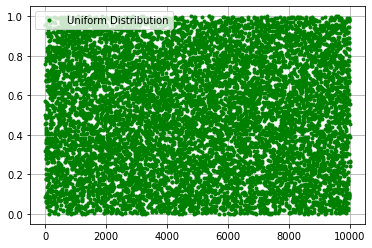

In [25]:
from matplotlib import pyplot as plt
x = np.random.rand(10000) #每个的概率
t = np.arange(len(x))
plt.plot(t,x,'g.',label="Uniform Distribution")
plt.legend(loc="upper left")
plt.grid()
plt.show()